# Loading an example dataset
scikit-learn comes with a few standard datasets, for instance the iris and digits datasets for classification and the boston house prices dataset for regression.

In the following, we start a Python interpreter from our shell and then load the iris and digits datasets. Our notational convention is that $ denotes the shell prompt while >>> denotes the Python interpreter prompt:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
import ARFFparser  # Parser definido por el usuario

iris = datasets.load_iris()       # Base de datos IRIS
digits = datasets.load_digits()   # Base de datos MNIST

CGM = ARFFparser.ARFFparser('Data/GCM_Training.arff')   # Base de datos CGM


#=========================================================
# IRIS
X = iris.data
Y = iris.target
L = iris.target_names[iris.target]

# DIGITS
#X = digits.data
#Y = digits.target
#L = digits.target_names[digits.target]

# CGM
#X = CGM['values']
#Y = [CGM['class'].index(t) for t in CGM['target']]
#L = CGM['target']
#=========================================================

/home/asusn56/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


SyntaxError: invalid syntax (ARFFparser.py, line 131)

A dataset is a dictionary-like object that holds all the data and some metadata about the data. This data is stored in the .data member, which is a *n_samples*, *n_features* array. In the case of supervised problem, one or more response variables are stored in the .target member. More details on the different datasets can be found in the dedicated section.

For instance, in the case of the digits dataset, digits.data gives access to the features that can be used to classify the digits samples:

In [2]:
print 'DIGITS'
print(digits.data[4].reshape(8,8))

# PLOTTING digit "4"
plt.imshow(digits.data[4].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-2-ae6dcaa19add>, line 1)

and digits.target gives the ground truth for the digit dataset, that is the number corresponding to each digit image that we are trying to learn:

In [3]:
print('IRIS')
print(iris.target)
print(iris.target_names[iris.target])

print('\nDIGITS')
print(digits.target)
print(digits.target_names[digits.target])

print('\nCGM')
print(CGM['target'])
print([CGM['class'].index(t) for t in CGM['target']])

IRIS
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versico

# DATA VISUALIZATION
## Dimmensionality reduction


/usr/lib64/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


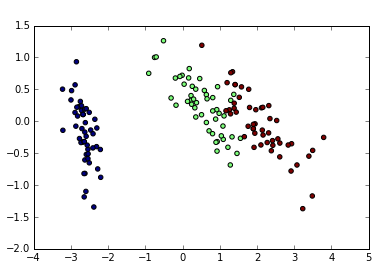

In [4]:
from sklearn import manifold
from sklearn.decomposition import PCA
from matplotlib.ticker import NullFormatter


# MAPA DE COLORES
CMAP = plt.cm.jet
#CMAP = plt.cm.Spectral

n_neighbors = 10
n_components = 2



#------
# PCA
#------
Ypred = PCA(n_components=2, whiten=False).fit(X).transform(X)
plt.scatter(Ypred[:, 0], Ypred[:, 1], c=Y, cmap=CMAP)
plt.title('PCA', color='white', fontsize=18)



#---------------------------
# LOCALLY LINEAR EMBEDDING
#
# methods:
#         - standard
#         - ltsa
#         - hessian
#         - modified
#
#---------------------------
#Ypred = manifold.LocallyLinearEmbedding(n_neighbors, n_components, eigen_solver='auto', method='standard').fit_transform(X)
#plt.scatter(Ypred[:, 0], Ypred[:, 1], c=Y, cmap=CMAP)
#plt.title('LLE', color='white', fontsize=18)


#--------
# ISOMAP
#--------
#Ypred = manifold.Isomap(n_neighbors, n_components).fit_transform(X)
#plt.scatter(Ypred[:, 0], Ypred[:, 1], c=Y, cmap=CMAP)
#plt.title('ISOMAP', color='white', fontsize=18)


#-------------------------
# MDS
#-------------------------
#Ypred = manifold.MDS(n_components, max_iter=100, n_init=1).fit_transform(X)
#plt.scatter(Ypred[:, 0], Ypred[:, 1], c=Y, cmap=CMAP)
#plt.title('MDS', color='white', fontsize=18)


#-------------------------
# SPECTRAL EMBEDDING
#-------------------------
#Ypred = manifold.SpectralEmbedding(n_components=n_components, n_neighbors=n_neighbors).fit_transform(X)
#plt.scatter(Ypred[:, 0], Ypred[:, 1], c=Y, cmap=CMAP)
#plt.title('Spectral Embedding', color='white', fontsize=18)


#-------------------------
# t-SNE
#-------------------------
#Ypred = manifold.TSNE(n_components=n_components, init='pca', random_state=0).fit_transform(X)
#plt.scatter(Ypred[:, 0], Ypred[:, 1], c=Y, cmap=CMAP)
#plt.title('t-SNE', color='white', fontsize=18)

# PREPROCESSING

The *sklearn.preprocessing* package provides several common utility functions and transformer classes to change raw feature vectors into a representation that is more suitable for the downstream estimators.

In [5]:
from sklearn import preprocessing

### STANDARIZATION
Normalization is the process of scaling individual samples to have unit norm. This process can be useful if you plan to use a quadratic form such as the dot-product or any other kernel to quantify the similarity of any pair of samples.

In [6]:
scaler = preprocessing.StandardScaler().fit(X)                    # Built scaler to normalize values (mean=0.0 and std=1.0)
#scaler = preprocessing.MinMaxScaler(feature_range=(0,1)).fit(X)  # Built scaler to scale values in range [Xmin,Xmax]
#scaler = preprocessing.MaxAbsScaler().fit(X)                     # Built scaler to scale values in range [-1,1]

# APPLY TRAINED SCALER
X_scaled = scaler.transform(X)

X_scaled.mean(axis=0)
#X_scaled.std(axis=0)

array([ -1.69031455e-15,  -1.63702385e-15,  -1.48251781e-15,
        -1.62314606e-15])

### NORMALIZATION

**Normalization** is the process of **scaling individual samples to have unit norm**. This process can be useful if you plan to use a quadratic form such as the dot-product or any other kernel to quantify the similarity of any pair of samples.

In [7]:
W = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]

normalizer = preprocessing.Normalizer(copy=True, norm='l1').fit(W)  # fit does nothing

normalizer.transform(W)

array([[ 0.25, -0.25,  0.5 ],
       [ 1.  ,  0.  ,  0.  ],
       [ 0.  ,  0.5 , -0.5 ]])

# TRAINING A CLASSIFFIER

In [8]:
from sklearn import svm
from sklearn import ensemble
from sklearn import naive_bayes
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree


#------
# SVM
#------
clf = svm.SVC(kernel='linear', gamma=0.1, C=1, cache_size=500).fit(X, Y)
#clf = svm.SVC(kernel='poly', degree=3, gamma=0.000075, C=1, cache_size=500).fit(X, Y)
#clf = svm.SVC(kernel='rbf', degree=3, gamma=0.000075, C=1, cache_size=500).fit(X, Y)


#------------
# ENSEMBLES
#------------
#clf = ensemble.RandomForestClassifier(50,criterion='entropy').fit(X, Y)
#clf = ensemble.AdaBoostClassifier(n_estimators=50, learning_rate=1.0).fit(X, Y)
#clf = ensemble.BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5).fit(X, Y)


#--------------
# NAIVE BAYES
#--------------
#clf = naive_bayes.GaussianNB().fit(X, Y)


#----------
# TREES
#----------
#clf = tree.DecisionTreeClassifier().fit(X, Y)

#from IPython.display import Image         # VISUALIZANDO EL ARBOL
#from sklearn.externals.six import StringIO
#import pydot
#dot_data = StringIO()
#tree.export_graphviz(clf,
#                     out_file = dot_data,
#                     feature_names = iris.feature_names,
#                     max_depth=4)
#
#graph = pydot.graph_from_dot_data(dot_data.getvalue())
#Image(graph.create_png())




#---------------
# PREDICT DATA
#---------------
X_pred = clf.predict(X)
#X_pred = clf.predict_proba(X)

print X_pred
#print [1 if iris.target_names[X_pred[ii]] == iris.target_names[iris.target[ii]] else 0 for ii in xrange(len(X_pred))]

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# PARTITIONING DATA AND PERFORMANCE MEASURES

### Performance measures

$Sensitivity (TPR) = \frac{TP}{TP+FN} \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; Specificity (TNR) = \frac{TN}{TN+FP}$

$Precision = \frac{TP}{TP+FP} \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; Accuracy = \frac{TP+TN}{P+N}$

$F_{1}score = \frac{2 \cdot TP}{2 \cdot TP + TP + FN} \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; UAR = \frac{1}{\vert C \vert} \cdot \displaystyle\sum_{k=1}^{\vert C \vert} \frac{TP_{k}}{TP_{k} + FN_{k}}$ 

### SPLITTING DATA

In [9]:
from sklearn import cross_validation, metrics

# TRAIN: 60% -- TEST: 40%
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X,
                                                                     Y,
                                                                     test_size=0.4,
                                                                     random_state=0)

print('-----------')
print('TRAIN DATA')
print X_train.shape
print Y_train.shape

print('-----------')
print('TEST DATA')
print X_test.shape
print Y_test.shape

-----------
TRAIN DATA
(90, 4)
(90,)
-----------
TEST DATA
(60, 4)
(60,)


In [10]:
clf = svm.SVC(kernel='linear', C=1).fit(X_train, Y_train)

#======================
# SCORE CALCULATION
#======================
score = clf.score(X_test, Y_test)

print("\nAccuracy: %0.2f" % (score))



#===================
# CONFUSSION MATRIX
#===================
Y_pred = clf.predict(X_test)

print('\nCONFUSSION MATRIX')
print metrics.confusion_matrix(Y_test,Y_pred)


#=========
# REPORT
#=========
print("\n\nClassification report for classifier %s:\n\n%s\n"
      %
      (clf, metrics.classification_report(Y_test, Y_pred)))


Accuracy: 0.97

CONFUSSION MATRIX
[[16  0  0]
 [ 0 22  1]
 [ 0  1 20]]


Classification report for classifier SVC(C=1, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False):

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        16
          1       0.96      0.96      0.96        23
          2       0.95      0.95      0.95        21

avg / total       0.97      0.97      0.97        60




### CROSS VALIDATION

In [11]:
scores = cross_validation.cross_val_score(clf,
                                          X, 
                                          Y,
                                          cv=5,
                                          scoring='accuracy') # scoring: accuracy, f1_weighted. etc

print scores
print("\nAccuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

[ 0.96666667  1.          0.96666667  0.96666667  1.        ]

Accuracy: 0.98 (+/- 0.02)


### <h5> LEAVE-P-OUT </h5>

In [12]:
lpo = cross_validation.LeavePOut(6, p=2)
print('-----------')
print('LEAVE-P-OUT')
for train, test in lpo:
    print("%s %s" % (train, test))

-----------
LEAVE-P-OUT
[2 3 4 5] [0 1]
[1 3 4 5] [0 2]
[1 2 4 5] [0 3]
[1 2 3 5] [0 4]
[1 2 3 4] [0 5]
[0 3 4 5] [1 2]
[0 2 4 5] [1 3]
[0 2 3 5] [1 4]
[0 2 3 4] [1 5]
[0 1 4 5] [2 3]
[0 1 3 5] [2 4]
[0 1 3 4] [2 5]
[0 1 2 5] [3 4]
[0 1 2 4] [3 5]
[0 1 2 3] [4 5]


In [13]:
C = iris.target_names
#C = digits.target_name
#C = CGM['target']

SCORE = []
UAR = []

loo = cross_validation.LeavePOut(len(X),p=1)

for train, test in loo:
    
    X_train = X[train,:]
    Y_train = Y[train]
    
    X_test = X[test,:]
    Y_test = Y[test]
    
    #----------------------------------------------
    # PREPROCESSING?? --> i.e. mean=0.0 - var=1.0
    #----------------------------------------------
    
    
    #======================
    # TRAIN SVM
    #======================
    clf.fit(X_train,Y_train)
    
    
    #======================
    # SVM PREDICTION
    #======================
    Y_pred = clf.predict(X_test)
    
    
    #======================
    # SCORE CALCULATION
    #======================
    score = clf.score(X_test, Y_test)
    
    #===============================
    # CONFUSSION MATRIX CALCULATION
    #===============================
    M = np.float64(metrics.confusion_matrix(Y_test,Y_pred),labels=C)
    
    #===============================
    # UAR CALCULATION
    #===============================
    uar = np.diag(M)/np.sum(M,1)
    
    #===============================
    # SAVE MEASURES
    #===============================
    SCORE.append(score)
    UAR.append(uar)
    
                
#========================
# REPORT
#========================
print '==========='
print '   TEST   '
print '===========\n'
print('SCORE: %.6f\n') % (score.flatten())
print('ACCURACY: %.6f +/- %.6f\n') % (score.mean(), score.std())
print('UAR: %.6f +/- %.6f\n') % (np.mean(uar),np.std(uar))

   TEST   

SCORE: 1.000000

ACCURACY: 1.000000 +/- 0.000000

UAR: 1.000000 +/- 0.000000



-c:48: RuntimeWarning: invalid value encountered in divide


<h5> k-folding </h5>

In [14]:
kf = cross_validation.KFold(len(X_train), n_folds=5)
# skf = cross_validation.StratifiedKFold(X_train,5)
# bkf = balanced_cross_validation(X_train,5)


scores = cross_validation.cross_val_score(clf,
                                          X, 
                                          Y,
                                          cv=kf,
                                          scoring='accuracy') # scoring: accuracy, f1_weighted. etc

print scores
print("\nAccuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

[ 1.          1.          0.86666667  0.96666667  0.86206897]

Accuracy: 0.94 (+/- 0.06)


<hr>

# OPTIONAL

### GRID SEARCH: Searching for estimator parameters

A search consists of:

- an estimator (regressor or classifier such as sklearn.svm.SVC())
- a parameter space
- a method for searching or sampling candidates
- a cross-validation scheme
- a score function

Grid search procedure can be combined with cross validation for a more robust parameter selection.

In [15]:
from sklearn import grid_search

parameters = {'kernel':['linear','rbf'], 'C':[0.1,1,10,100]}

#parameters = [
#  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
#  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
# ]

clf = grid_search.GridSearchCV(svm.SVC(cache_size=500),
                               parameters)

clf.fit(X, Y)

print("Best parameters set found on development set:\n")

print(clf.best_params_)

print("\nGrid scores on development set:")

for params, mean_score, scores in clf.grid_scores_:
    print("%0.3f (+/-%0.03f) for %r"
          %
          (mean_score, scores.std(), params))

Best parameters set found on development set:

{'kernel': 'linear', 'C': 1}

Grid scores on development set:
0.960 (+/-0.016) for {'kernel': 'linear', 'C': 0.1}
0.953 (+/-0.024) for {'kernel': 'rbf', 'C': 0.1}
0.980 (+/-0.016) for {'kernel': 'linear', 'C': 1}
0.973 (+/-0.009) for {'kernel': 'rbf', 'C': 1}
0.973 (+/-0.037) for {'kernel': 'linear', 'C': 10}
0.980 (+/-0.016) for {'kernel': 'rbf', 'C': 10}
0.967 (+/-0.033) for {'kernel': 'linear', 'C': 100}
0.960 (+/-0.042) for {'kernel': 'rbf', 'C': 100}


### MODEL PERSISTENCE

It is possible to save a model in the scikit by using Python’s built-in persistence model, namely pickle:

In [16]:
from sklearn import datasets

clf = svm.SVC()
clf.fit(X, Y)
y = clf.predict(X[0:1])

print(('Predicted value: y = %s\n')%(y))

#SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, \
#    decision_function_shape=None, degree=3, gamma='auto', \
#    kernel='rbf', max_iter=-1, probability=False, \
#    random_state=None, shrinking=True,  tol=0.001, verbose=False)

import cPickle as pickle
#-----------------------
# SAVE MODEL
#-----------------------
with open('model.pkl', 'wb') as fp:
    pickle.dump(clf, fp)


#-----------------------
# DELETE MODEL
#-----------------------
del clf

try:
    y = clf.predict(X[0:1])
    print(('Predicted value: y = %s\n')%(y))
except:
    print('Unavailable model. y = ???\n')


#-----------------------
# LOAD MODEL
#-----------------------
with open('model.pkl', 'rb') as fp:
    clf2 = pickle.load(fp)

z = clf2.predict(X[0:1])

print(('Predicted value: z = %s\n')%(z))

Predicted value: y = [0]

Unavailable model. y = ???

Predicted value: z = [0]



<hr>

# EXAMPLE: DIGITS RECOGNITION (MNIST)

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3,
  gamma=0.001, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.99      0.97      0.98        91
          2       0.99      0.99      0.99        86
          3       0.98      0.87      0.92        91
          4       0.99      0.96      0.97        92
          5       0.95      0.97      0.96        91
          6       0.99      0.99      0.99        91
          7       0.96      0.99      0.97        89
          8       0.94      1.00      0.97        88
          9       0.93      0.98      0.95        92

avg / total       0.97      0.97      0.97       899


Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79 

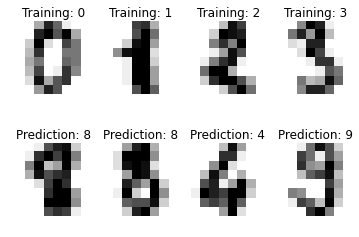

In [17]:
# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

#-------------------------
# ¿APLICAR NORMALIZACION?
#-------------------------


# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 3 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# pylab.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# We learn the digits on the first half of the digits
clf.fit(data[:n_samples / 2], digits.target[:n_samples / 2])

# Now predict the value of the digit on the second half:
expected = digits.target[n_samples / 2:]
predicted = clf.predict(data[n_samples / 2:])

print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(expected, predicted)))

print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

images_and_predictions = list(zip(digits.images[n_samples / 2:], predicted))

for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()